Estimated Gravity = 10.006553037541376
Estimated Error in Gravity = 0.9811689882944845


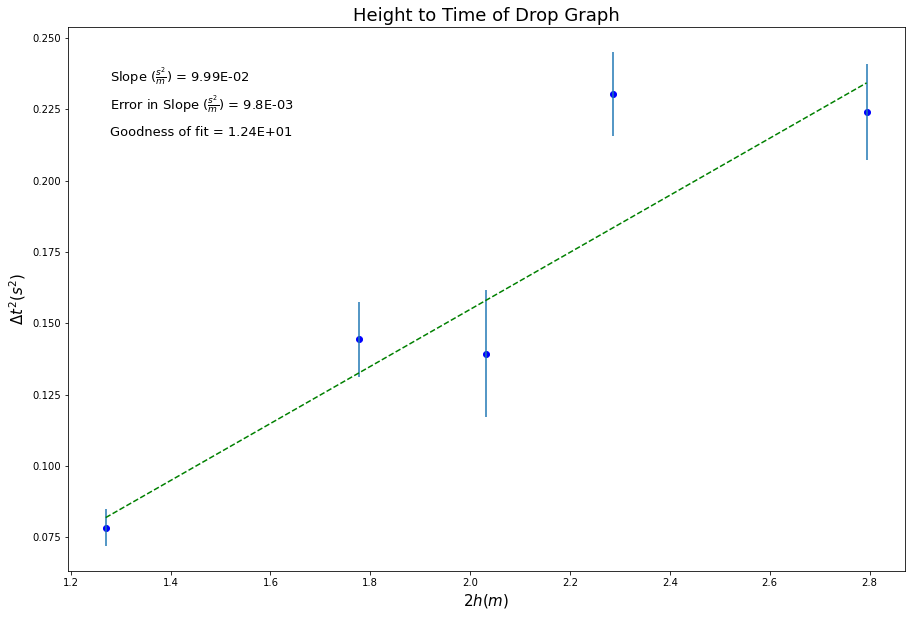

In [8]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018, Aug 2020(for Python 3.8)
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading in the CSV file...
df = pd.read_csv("Part2Data.csv")

# Convert inches to meters (Using the conversion constant below).
df["Height (meters)"] = df["Height (inches)"] / 39.37

# Get the standard deviation of the times by height.
tstd = df.groupby("Height (inches)").std()["Time (s)"]
# Get the average time by height...
df = df.groupby("Height (inches)").mean()

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
height = df["Height (meters)"] * 2 # In meters
time = df["Time (s)"] # In seconds
timesq = df["Time (s)"] ** 2 # In seconds squared

# There are 3 values measured at each height.
# This is the same method used in part 1 for estimating delta t.
# Likely not as good since our number of trails per height is lower,
# but based on looking at the values the error bounds given seem
# reasonable.
delta_t = tstd / np.sqrt(3)

# We compute the delta_t^2 error by applying the formula from rule 4.
timesq_error = timesq * np.sqrt(((2 * delta_t) / time) ** 2)

#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = height   #this should be the array you want to plot on the x axis
y = timesq
dy = timesq_error  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

# Print the estimated value for gravity and its error...
print("Estimated Gravity =", 1 / m)
print("Estimated Error in Gravity =", dm / (m ** 2))

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
plt.xlabel('$2h (m)$', fontsize=15)
plt.ylabel('$\Delta t^2 (s^2)$', fontsize=15)
plt.title('Height to Time of Drop Graph', fontsize=18)
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars

# Switched to F-Strings, easier to read now...
# \f is escape for a formfeed, so make the string a raw string (r'Text here...')
plt.annotate(fr'Slope ($\frac{{s^2}}{{m}}$) = {m:.2E}',
             (0.05, 0.9), xycoords='axes fraction', fontsize = 13)

plt.annotate(fr'Error in Slope ($\frac{{s^2}}{{m}}$) = {dm:.1E}',
             (0.05, 0.85), xycoords='axes fraction', fontsize = 13)
 
plt.annotate(f'Goodness of fit = {N:.2E}',
             (0.05, 0.80), xycoords='axes fraction', fontsize = 13)

plt.show()
